# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 2. Простой анализ данных.

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`** и html-версии графиков (подробности в условии).
* Телеграм не разрешает боту получать файлы более **20 Мб**. Если ваше решение весит больше, *заранее* разделите ноутбук на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания **используйте этот ноутбук в качестве основы, ничего не удаляя из него**. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 1.**

---

**Баллы за задание:**

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 2 &mdash; 80 баллов

---

In [ ]:
# Bot check

# HW_ID: fpmi_ad2
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.3, palette="Set2")


---
### <font color="orange"><i>Сложная часть</i></font>

### Задача 2

<a target="_blank" href="https://www.yelp.com/">Yelp</a> — веб-сайт для поиска на местном рынке услуг, например ресторанов или парикмахерских, с возможностью добавлять и просматривать рейтинги и обзоры этих услуг. Для популярных бизнесов имеются сотни обзоров. Для обозревателей на сайте предусмотрены элементы социальной сети.

![Yelp_Logo_No_Outline_Color.jpg](attachment:Yelp_Logo_No_Outline_Color.jpg)

_____________

Вам предоставляется следующая информация о компаниях на Yelp:

Файл `yelp_business.csv`:
* `business_id` — уникальный идентификатор компании;
* `name` — имя компании;
* `address`, `city`, `state` — месторасположении компании;
* `latitude`, `longitude` — географические координаты;
* `categories` — категории услуг компании.

Файл `yelp_review.csv`, содержащий оценки пользователей:
* `business_id` — идентификатор компании, соответствующий файлу `yelp_business.csv`;
* `stars` — поставленная пользователем оценка от 1 до 5.

В целях сокращения объема файла, текстовые отзывы пользователей не были включены.

Оригинальную версию датасета в формате `json` можно посмотреть по <a target="_blank" href="https://www.kaggle.com/yelp-dataset/yelp-dataset/data">ссылке</a>, но использовать нужно выданные данные.

_____________

**Что нужно сделать:**

* Найти город с наибольшим количеством компаний;
* Для этого города определить районы с наиболее качественными услугами. <a target="_blank" href="https://yandex.ru/company/researches/2017/msk_mobile_map">Пример</a> с несколько другой задачей.
* А также найти рестораны с наилучшими отзывами.


*Далее в условии встречаются различные подсказки, как можно выполнить определенные части задачи. Вы можете их игнорировать и делать иным способом для получения **того же самого промежуточного результата**. Однако, если ваше решение окажется **значительно** менее эффективным (по скорости, количеству и красоте кода) по сравнению с предполагаемым, баллы могут быть снижены.*

------

#### 1. Город с наибольшим количеством компаний

Загрузите данные из файла `yelp_business.csv` с помощью функции `pd.read_csv`. Посмотрите на первые несколько строк с помощью метода `head`.

In [ ]:
from google.colab import drive
import os

In [ ]:
def _load_recourses():  # в своём google drive нужно создать папку Data_ABG, туда залить все csv, не меняя их имена и названия колонок
    drive.mount("/content/gdrive")
    os.environ["KAGGLE_CONFIG_DIR"] = "/content/gdrive/My Drive"
    %cd /content/gdrive/My Drive/mipt_stat

In [ ]:
drive.mount("/content/drive")
_load_recourses()

Mounted at /content/drive
Mounted at /content/gdrive
/content/gdrive/My Drive/mipt_stat


In [ ]:
data_business = pd.read_csv("./yelp_business.csv")

In [ ]:
data_business.head()

,Unnamed: 0,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,is_open,categories
0,0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,1,Dentists;General Dentistry;Health & Medical;Or...
1,1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1,Departments of Motor Vehicles;Public Services ...
3,3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,0,Sporting Goods;Shopping
4,4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


Найдите пять городов, по которым присутствует информация о наибольшем количестве компаний. В таблице должен быть указан город (название) и количество компаний в этом городе.

*Подсказка.* Для выполнения стоит воспользоваться методами `groupby`, `count`, `sort_values`, `head`.

In [ ]:
(data_business.groupby(["city"]).count()).sort_values(
    by="name", ascending=False
)["name"].head()

city
Las Vegas     26775
Phoenix       17213
Toronto       17206
Charlotte      8553
Scottsdale     8228
Name: name, dtype: int64

Пусть `N` &mdash; город с наибольшим количеством компаний. Оставьте в таблице только записи, соответствующие городу `N`. Нанесите все эти компании на график, в котором по оси $x$ отметьте долготу, а по оси $y$ &mdash; широту.

In [ ]:
data_LV = data_business.loc[data_business["city"] == "Las Vegas"]

In [ ]:
data_LV.head()

,Unnamed: 0,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,is_open,categories
6,6,kCoE3jvEtg6UVz5SOD3GVw,"""BDJ Realty""",Summerlin,"""2620 Regatta Dr, Ste 102""",Las Vegas,NV,89128,36.207430,-115.268460,1,Real Estate Services;Real Estate;Home Services...
7,7,OD2hnuuTJI9uotcKycxg1A,"""Soccer Zone""",NaN,"""7240 W Lake Mead Blvd, Ste 4""",Las Vegas,NV,89128,36.197484,-115.249660,1,Shopping;Sporting Goods
26,26,VBHEsoXQb2AQ76J9l8h1uQ,"""Alfredo's Jewelry""",Southeast,"""5775 S Eastern, Ste 103""",Las Vegas,NV,89119,36.085051,-115.119421,1,Shopping;Jewelry;Watch Repair;Local Services
41,41,1Jp_hmPNUZArNqzpbm7B0g,"""Task Electric""",Spring Valley,"""7260 Cimarron Rd, Ste 130""",Las Vegas,NV,89113,36.056382,-115.269332,1,Home Services;Lighting Fixtures & Equipment;Lo...
48,48,DPQnTnNw2PJj7DdENM98Cw,"""Star Nursery""",NaN,"""5340 Boulder Hwy""",Las Vegas,NV,89122,36.105196,-115.056880,1,Nurseries & Gardening;Home & Garden;Shopping


In [ ]:
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

fig = go.Figure(
    go.Scattermapbox(lat=data_LV["latitude"], lon=data_LV["longitude"])
)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(width=800, height=600, title="Компании в Лас Вегасе")
fig.show()  # откройте файл map1.html

In [ ]:
from IPython.display import IFrame

IFrame("map1.html", width="100%", height="600px")

Сам город находится в сгустке точек. Есть какие-то компании, которые приписаны к этому городу, но находятся далеко от него. Избавьтесь от них, подобрав некоторые границы значений широты и долготы. Изобразите все компании на новом графике. На этом графике должны выделяться некоторые улицы.

In [ ]:
data_LV = data_LV.loc[
    (data_LV["latitude"] > 35.92)
    & (data_LV["latitude"] < 36.37)
    & (data_LV["longitude"] > -115.65)
    & (data_LV["longitude"] < -114.92)
]

In [ ]:
map_center = go.layout.mapbox.Center(
    lat=(data_LV["latitude"].max() + data_LV["latitude"].min()) / 2,
    lon=(data_LV["longitude"].max() + data_LV["longitude"].min()) / 2,
)

In [ ]:
fig = go.Figure(
    go.Scattermapbox(lat=data_LV["latitude"], lon=data_LV["longitude"])
)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(
    mapbox=dict(center=map_center, zoom=10),
    width=1000,
    height=800,
    title="Компании в Лас Вегасе",
)
fig.show()  # откройте файл map2.html

In [ ]:
IFrame("map2.html", width="100%", height="600px")

Разберитесь с тем, как подгрузить интерактивную карту города в качестве фона графика. Можно пойти двумя следующими способами.
1. Изучить <a href="https://miptstats.github.io/courses/python/11_plotly.html" target="_blank">материалы</a> по библиотеке <a href="https://plotly.com/python/" target="_blank"><b>Plotly</b></a>. Возможно, потребуется также заглянуть в документацию.
1. Поразбираться с библиотекой <a href="https://github.com/python-visualization/folium" target="_blank"><b>Folium</b></a>. Посмотрите множество <a href="https://nbviewer.org/github/python-visualization/folium/tree/main/examples/" target="_blank">примеров</a>, может также помочь <a href="https://proglib.io/p/python-web-map" target="_blank">статья на русском</a>.

*Внимание!* Интерактивная карта может не сохраниться в ноутбуке, а если сохранится, то вес ноутбука может превзойти 20 Мб, и его не получится отправить боту. В любом случае **<u>необходимо сохранить карту в html и отправить ее отдельным файлом в бот.</u>** При этом каждый файл html должен не превышать 20 Мб, присылать файлы в архиве нельзя. Аналогично со всеми следующими интерактивными графиками в этом задании.

In [ ]:
fig = go.Figure(
    go.Scattermapbox(lat=data_LV["latitude"], lon=data_LV["longitude"])
)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(
    mapbox=dict(center=map_center, zoom=10),
    width=1000,
    height=800,
    title="Компании в Лас Вегасе",
)
fig.show()  # откройте файл map3.html

In [ ]:
IFrame("map3.html", width="100%", height="600px")

Если все получилось, вы молодцы! Далее в этой задаче тоже стройте интерактивные карты. Если нет желания разбираться с интерактивными графиками, можно построить статичные, но баллы будут снижены.

#### 2. Оценки компаний

Для выполнения задания нужно посчитать среднюю оценку каждой компании, а также количество выставленных оценок.

Загрузите таблицу оценок `yelp_review.csv`.

In [ ]:
data_review = pd.read_csv("./yelp_review.csv")
data_review.head()

,Unnamed: 0,business_id,stars
0,0,AEx2SYEUJmTxVVB18LlCwA,5
1,1,VR6GpWIda3SfvPC-lg9H3w,5
2,2,CKC0-MOWMqoeWf6s-szl8g,5
3,3,ACFtxLv8pGrrxMm6EgjreA,4
4,4,s2I_Ni76bjJNK9yG60iD-Q,4


В подгруженной таблице оценок оставьте только компании города `N`. Для этого установите значения `business_id` в качестве индекса у таблицы оценок и воспользуйтесь методом `loc`.

*Подсказка.* Чтобы индекс снова сделать полем таблицы, можно воспользоваться методом `reset_index`.

In [ ]:
data_review = data_review.set_index("business_id")

In [ ]:
data_review = data_review.loc[data_LV["business_id"]]

In [ ]:
data_review = data_review.drop(columns=["Unnamed: 0"])
data_review.head()

,stars
business_id,
kCoE3jvEtg6UVz5SOD3GVw,4
kCoE3jvEtg6UVz5SOD3GVw,1
kCoE3jvEtg6UVz5SOD3GVw,5
kCoE3jvEtg6UVz5SOD3GVw,5
kCoE3jvEtg6UVz5SOD3GVw,5


Теперь посчитайте среднюю оценку каждой компании, а также количество выставленных компании оценок.

*Подсказка.* Помочь в этом могут функции `groupby` и `aggregate([np.mean, np.size])`.

In [ ]:
data_review = (data_review.groupby(["business_id"])).aggregate(
    [np.mean, np.size]
)

Назовите колонки таблицы красивыми именами, изменив `<имя таблицы>.columns`, после чего напечатайте несколько строк полученной таблицы. Красивые имена &mdash; то, что будет понятно простому человеку при чтении ваших результатов. Как именно их назвать &mdash; задача аналитика, то есть в данном случае ваша :)

In [ ]:
data_review.columns = ["average_grade", "number_of_reviews"]
data_review.head()

,average_grade,number_of_reviews
business_id,,
--9e1ONYQuAa-CB_Rrw7Tw,4.088904,1451
--DdmeR16TRb3LsjG0ejrQ,3.200000,5
--WsruI0IGEoeRmkErU5Gg,4.928571,14
--Y7NhBKzLTbNliMUX_wfg,4.875000,8
--e8PjCNhEz32pprnPhCwQ,3.473684,19


Соедините две полученные ранее таблицы по компаниям города `N` в одну.
Для этого сначала установите поле `business_id` в качестве индекса в обеих таблицах с помощью `set_index`. В одной из них это уже должно было быть сделано.
В полученной таблице должны получится поля `latitude`, `longitude`, `categories`, `name`, а также две колонки со средней оценкой компаний и количеством оценок, которые вы посчитали выше.

*Подсказка.* Соединение таблиц можно выполнить с помощью `join`.
Индексы у этих таблиц одинаковые, так что тип джойна не имеет значения.

In [ ]:
data_LV = data_LV.set_index("business_id")
data = data_LV.join(data_review)
data = data.drop(columns=["Unnamed: 0"])

data.head()

,name,neighborhood,address,city,state,postal_code,latitude,longitude,is_open,categories,average_grade,number_of_reviews
business_id,,,,,,,,,,,,
kCoE3jvEtg6UVz5SOD3GVw,"""BDJ Realty""",Summerlin,"""2620 Regatta Dr, Ste 102""",Las Vegas,NV,89128,36.207430,-115.268460,1,Real Estate Services;Real Estate;Home Services...,4.000000,5
OD2hnuuTJI9uotcKycxg1A,"""Soccer Zone""",NaN,"""7240 W Lake Mead Blvd, Ste 4""",Las Vegas,NV,89128,36.197484,-115.249660,1,Shopping;Sporting Goods,1.444444,9
VBHEsoXQb2AQ76J9l8h1uQ,"""Alfredo's Jewelry""",Southeast,"""5775 S Eastern, Ste 103""",Las Vegas,NV,89119,36.085051,-115.119421,1,Shopping;Jewelry;Watch Repair;Local Services,4.739130,23
1Jp_hmPNUZArNqzpbm7B0g,"""Task Electric""",Spring Valley,"""7260 Cimarron Rd, Ste 130""",Las Vegas,NV,89113,36.056382,-115.269332,1,Home Services;Lighting Fixtures & Equipment;Lo...,4.450000,20
DPQnTnNw2PJj7DdENM98Cw,"""Star Nursery""",NaN,"""5340 Boulder Hwy""",Las Vegas,NV,89122,36.105196,-115.056880,1,Nurseries & Gardening;Home & Garden;Shopping,3.680000,25


Изобразите все компании на графике, раскрасив точку в цвет, оттенок которого соответствует средней оценке компании. Прозрачность точки выставляйте не более $0.3$. Если у одной компании несколько филиалов с разными адресами, наносите на график все адреса.

In [ ]:
fig = go.Figure(
    go.Scattermapbox(
        lat=data["latitude"],
        lon=data["longitude"],
        marker=dict(
            colorbar=dict(title="Средняя оценка"),
            color=data["average_grade"],
            opacity=0.3,
        ),
    )
)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(
    mapbox=dict(center=map_center, zoom=10),
    width=1000,
    height=800,
    title="Компании в Лас Вегасе",
)
fig.show()  # откройте файл map4.html

In [ ]:
IFrame("map4.html", width="100%", height="600px")

Чтобы получить районы города, то есть разделить город на "клетки", округлите значения широты и долготы, подобрав оптимальный размер района.

*Подсказка.* Например, можно сделать так
`np.round(долгота*4, decimals=1)*0.25`.

In [ ]:
fig = go.Figure(
    go.Scattermapbox(
        mode="markers",
        lat=data["latitude"].apply(
            lambda x: np.round(x * 4, decimals=1) * 0.25
        ),
        lon=data["longitude"].apply(
            lambda x: np.round(x * 4, decimals=1) * 0.25
        ),
        marker=dict(
            colorbar=dict(title="Средняя оценка"),
            color=data["average_grade"],
            opacity=0.3,
            size=10,
        ),
    )
)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(
    mapbox=dict(center=map_center, zoom=10),
    width=1000,
    height=800,
    title="Компании в Лас Вегасе",
)
fig.show()  # откройте файл map5.html

In [ ]:
IFrame("map5.html", width="100%", height="600px")

Для получения средней оценки компаний по району постройте сводную таблицу при помощи `pd.pivot_table`, взяв в качестве индексов и колонок округленные широту и долготу, а в качестве значений &mdash; оценки. Аггрегирующей функцией является среднее.

Изобразите полученную таблицу при помощи `sns.heatmap`.

*Замечание.* В качестве среднего можно было бы посчитать как общее среднее по всем оценкам всех компаний, так и среднее по компаниям их средних оценок. В чем разница этих подходов? Какой из них необходимо использовать в данном случае?

* Нужно второе. Например, может быть один хороший ресторан, вытягивающий отзывы всех остальных компаний.

In [ ]:
table = pd.pivot_table(
    data,
    values="average_grade",
    index=data["latitude"].apply(lambda x: np.round(x * 4, decimals=1) * 0.25),
    columns=data["longitude"].apply(
        lambda x: np.round(x * 4, decimals=1) * 0.25
    ),
    aggfunc="mean",
)

<Axes: xlabel='longitude', ylabel='latitude'>

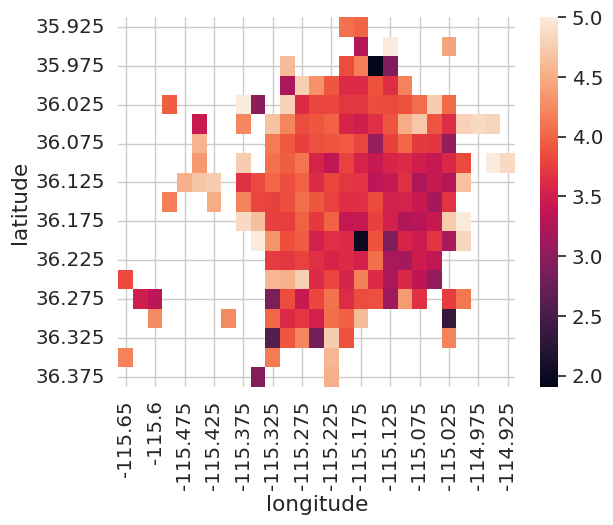

In [ ]:
import seaborn as sns

sns.heatmap(table)

Полученный график имеет ряд недостатков. Во-первых, не очень правильно судить о районе, если в нем мало компаний. Во-вторых,  на графике цветовая гамма автоматически подстроилась под минимальное и максимальное значения оценки.

Почему эти недостатки могут быть существенными?

**Ответ:**
* Мы хотим получить некоторое среднее значение качества компаний в районе. То есть, фактически, мы экстраполируем среднее значение по району на веьс район. Однако экстраполяция на основе небольшого количества значений может быть достаточно неточна.

* Оценка ряда компаний может быть искусственно занижена до 0, и таким образом вся цветовая гамма крайне нерелятивно "уползает" вниз. Аналогично с завышенными оценками, тогда гамма "уползает" вверх.

Оставьте районы, в которых имеется информация о не менее $30$ компаний. Постройте новый график районов, использовав параметры `vmin` и `vmax` у функции `sns.heatmap`.

In [ ]:
data_cp = data.reset_index()
data_cp["latitude"] = data_cp["latitude"].apply(
    lambda x: np.round(x * 4, decimals=1) * 0.25
)
data_cp["longitude"] = data_cp["longitude"].apply(
    lambda x: np.round(x * 4, decimals=1) * 0.25
)

In [ ]:
aranged_by_districts_LV = data_cp.groupby(["latitude", "longitude"]).size()
aranged_by_districts_LV_more_reveiws = data_cp[
    data_cp.apply(
        lambda x: aranged_by_districts_LV[(x["latitude"], x["longitude"])]
        >= 30,
        axis=1,
    )
]
aranged_by_districts_LV_more_reveiws.head(10)

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,is_open,categories,average_grade,number_of_reviews
0,kCoE3jvEtg6UVz5SOD3GVw,"""BDJ Realty""",Summerlin,"""2620 Regatta Dr, Ste 102""",Las Vegas,NV,89128,36.200,-115.275,1,Real Estate Services;Real Estate;Home Services...,4.000000,5
1,OD2hnuuTJI9uotcKycxg1A,"""Soccer Zone""",NaN,"""7240 W Lake Mead Blvd, Ste 4""",Las Vegas,NV,89128,36.200,-115.250,1,Shopping;Sporting Goods,1.444444,9
2,VBHEsoXQb2AQ76J9l8h1uQ,"""Alfredo's Jewelry""",Southeast,"""5775 S Eastern, Ste 103""",Las Vegas,NV,89119,36.075,-115.125,1,Shopping;Jewelry;Watch Repair;Local Services,4.739130,23
3,1Jp_hmPNUZArNqzpbm7B0g,"""Task Electric""",Spring Valley,"""7260 Cimarron Rd, Ste 130""",Las Vegas,NV,89113,36.050,-115.275,1,Home Services;Lighting Fixtures & Equipment;Lo...,4.450000,20
4,DPQnTnNw2PJj7DdENM98Cw,"""Star Nursery""",NaN,"""5340 Boulder Hwy""",Las Vegas,NV,89122,36.100,-115.050,1,Nurseries & Gardening;Home & Garden;Shopping,3.680000,25
5,_F3AMoo_zdl-he384ISQbw,"""Rock of Ages""",NaN,"""3700 W Flamingo Rd""",Las Vegas,NV,89109,36.125,-115.175,1,Arts & Entertainment;Performing Arts,4.084507,213
6,Pd52CjgyEU3Rb8co6QfTPw,"""Flight Deck Bar & Grill""",Southeast,"""6730 S Las Vegas Blvd""",Las Vegas,NV,89119,36.075,-115.175,1,Nightlife;Bars;Barbeque;Sports Bars;American (...,3.769231,13
7,4srfPk1s8nlm1YusyDUbjg,"""Subway""",Southeast,"""6889 S Eastern Ave, Ste 101""",Las Vegas,NV,89119,36.075,-115.125,1,Fast Food;Restaurants;Sandwiches,2.666667,6
8,n7V4cD-KqqE3OXk0irJTyA,"""GameWorks""",Southeast,"""6587 Las Vegas Blvd S, Ste 171""",Las Vegas,NV,89119,36.075,-115.175,1,Arcades;Arts & Entertainment;Gastropubs;Restau...,3.117479,349
9,Sx0C2RsDgrG3RxBBUoBqTw,"""Kool Radiator Service""",Westside,"""3228 Meade Ave""",Las Vegas,NV,89102,36.125,-115.175,1,Automotive;Auto Repair,3.555556,9


In [ ]:
table1 = pd.pivot_table(
    aranged_by_districts_LV_more_reveiws,
    values="average_grade",
    index=aranged_by_districts_LV_more_reveiws["latitude"],
    columns=aranged_by_districts_LV_more_reveiws["longitude"],
    aggfunc="mean",
)

<Axes: xlabel='longitude', ylabel='latitude'>

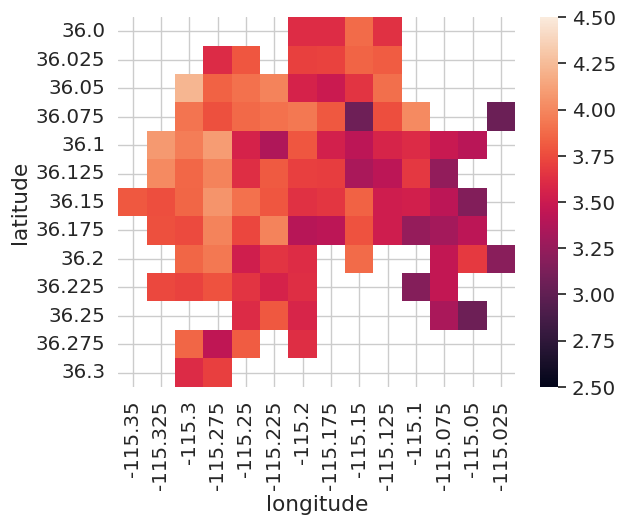

In [ ]:
import seaborn as sns

sns.heatmap(table1, vmin=2.5, vmax=4.5)

Сравните полученный график с предыдущим и сделайте вывод.

**Вывод:** Можно заметить, что оценка ряда районов существенно улучшилась, что подтверждает гипотезу о целенаправленном занижении отзывов у ряда ресторанов.

#### 3. Рестораны

Будем считать компанию рестораном, если в поле `categories` *содержится* слово `restaurant`. Обратите внимание, что в анализе данных часто нет четкого формата данных. Например, данное слово может быть написано как с большой буквы, так и с маленькой; может как разделяться `;`, так и не разделяться. При возникновении недопонимания стоит посмотреть данные.

Составьте таблицу, в которой будет информация о всех ресторанах города `N`, для которых имеется не менее $5$ отзывов. Далее постройте heatmap-график районов, в котором каждому району сопоставьте среднюю оценку по ресторанам этого района. Рассматривайте только те районы, в которых есть не менее $10$ ресторанов, для каждого из которых есть не менее $5$ отзывов.

In [ ]:
result_id = []
for i in data_cp.index:
    # print(data['categories'].iloc[i])
    lon = data_cp["longitude"].iloc[i]
    lat = data_cp["latitude"].iloc[i]
    if (
        ("restaurant" in str(data_cp["categories"].iloc[i]).lower())
        and (data_cp["number_of_reviews"].iloc[i] > 4)
        and (
            data_cp["name"]
            .loc[(data_cp["latitude"] == lat) & (data_cp["longitude"] == lon)]
            .size
            > 9
        )
    ):
        result_id.append(i)

In [ ]:
LV_rest = (data_cp).loc[result_id]

In [ ]:
table_rest = pd.pivot_table(
    LV_rest,
    values="average_grade",
    index=LV_rest["latitude"].apply(
        lambda x: np.round(x * 4, decimals=1) * 0.25
    ),
    columns=LV_rest["longitude"].apply(
        lambda x: np.round(x * 4, decimals=1) * 0.25
    ),
    aggfunc="mean",
)

<Axes: xlabel='longitude', ylabel='latitude'>

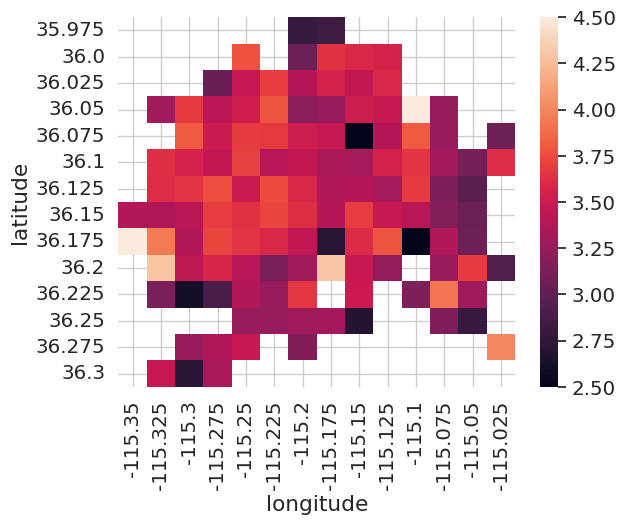

In [ ]:
import seaborn as sns

sns.heatmap(table_rest, vmin=2.5, vmax=4.5)

Чем полезны ограничения снизу на количество отзывов для ресторана и количество ресторанов в районе?

**Ответ:**
* Существуют районы, где ресторанов в принципе мало, и поэтому их оценки будут нерепрезентативны (люди либо едут есть в район, где ресторанов много, либо едят в этом, но в силу отсутствия выбора и конкуренции, оставляют не соответствующие реальности отзывы).

* В районах же с большим количеством ресторанов очевидно не следует ориентироваться на непопулярные, несмотря на то, что их может быть довольно много.

Кот Василий из города `N` очень придирчив к выбору ресторана. Он доверяет только ресторанам с высоким рейтингом, который основывается на большом количестве отзывов. Напечатайте в виде таблицы информацию $10$ ресторанах с самым большим рейтингом в порядке убывания рейтинга. Для каждого из этих ресторанов должно быть не менее $50$ отзывов. По каждому ресторану необходимо вывести следующую информации: название ресторана, средняя оценка, количество отзывов, географические координаты, категории.

In [ ]:
LV_rest.loc[LV_rest["number_of_reviews"] >= 50].sort_values(
    by="average_grade", ascending=False
).head(10)

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,is_open,categories,average_grade,number_of_reviews
3608,iBPyahdJRP5y0t25fF2W9w,"""Lip Smacking Foodie Tours""",The Strip,"""3635 Las Vegas Blvd S""",Las Vegas,NV,89109,36.125,-115.175,1,Food Tours;Restaurants;Event Planning & Servic...,4.966480,179
25442,Fmij544FE1iOruoxI41kew,"""Pepito Shack""",Downtown,"""1516 S Las Vegas Blvd""",Las Vegas,NV,89104,36.150,-115.150,0,Restaurants;Burgers;Food Stands;Sandwiches;Hot...,4.907692,65
16639,qw9SyduMZ53KB6GlBQqvZQ,"""Bosa Boba Cafe""",Chinatown,"""3355 Spring Mountain Rd, Ste 35""",Las Vegas,NV,89102,36.125,-115.175,1,Vietnamese;Bubble Tea;Sandwiches;Food;Coffee &...,4.890909,55
25765,k9b96JXlNewj36ddrce9Jw,"""Garden Grill""",Westside,"""302 S Rampart Blvd""",Las Vegas,NV,89145,36.175,-115.275,1,Tacos;Street Vendors;Farmers Market;Vegetarian...,4.868132,91
2134,IhNASEZ3XnBHmuuVnWdIwA,"""Brew Tea Bar""",Southwest,"""7380 S Rainbow Blvd, Ste 101""",Las Vegas,NV,89139,36.050,-115.250,1,Cafes;Tea Rooms;Food;Bubble Tea;Restaurants;De...,4.848069,1165
18982,k5ddmLvAKKw9zSusRPM2cQ,"""Poppa Naps BBQ""",Eastside,"""""",Las Vegas,NV,89121,36.125,-115.100,1,Food Stands;Hot Dogs;Caterers;Restaurants;Amer...,4.836538,104
12038,8fFTJBh0RB2EKG53ibiBKw,"""Zenaida's Cafe""",Eastside,"""3430 E Tropicana Ave, Ste 32""",Las Vegas,NV,89121,36.100,-115.100,1,Restaurants;Breakfast & Brunch;Cafes,4.833333,180
11941,l1GJnB9TJgGgEeI4at1M0A,"""El Frescos Cocina Mexicana""",Southeast,"""5030 Paradise Rd, Ste B""",Las Vegas,NV,89119,36.100,-115.150,0,Caterers;Mexican;Restaurants;Food;Event Planni...,4.816754,191
5352,hFT3HuxVZJb1uYEsYfp-0A,"""Blaqcat Ultra Hookah Lounge""",Westside,"""6340 W Charleston Blvd, Ste 140""",Las Vegas,NV,89146,36.150,-115.225,1,Adult Entertainment;Lounges;Hookah Bars;Restau...,4.809524,63
23668,wZkjm9TGa7nXLYHxhIRO5w,"""California Sushi Burrito""",Chinatown,"""4545 Spring Mountain Rd, Ste 101""",Las Vegas,NV,89102,36.125,-115.200,1,Asian Fusion;Fast Food;Restaurants;Japanese;Po...,4.807018,57


Нанесите на карту все рестораны со средней оценкой не менее $4.7$, которая посчитана по не менее $50$ отзывам. Отдельным цветом отметьте 10 ресторанов, которые вы получили ранее.

In [ ]:
LV_rest_high_rev = data.reset_index().loc[
    LV_rest.loc[
        (LV_rest["number_of_reviews"] >= 50) & (LV_rest["average_grade"] >= 4.7)
    ].index
]
LV_rest_high_rev["colors"] = np.full(LV_rest_high_rev["latitude"].size, "red")
LV_rest_high_rev["colors"].loc[
    LV_rest.loc[LV_rest["number_of_reviews"] >= 50]
    .sort_values(by="average_grade", ascending=False)
    .index[:10]
] = np.full(10, "green")

In [ ]:
fig = go.Figure(
    go.Scattermapbox(
        lat=LV_rest_high_rev["latitude"],
        lon=LV_rest_high_rev["longitude"],
        marker=dict(color=LV_rest_high_rev["colors"]),
    )
)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(
    mapbox=dict(center=map_center, zoom=10),
    width=1000,
    height=800,
    title="Компании в Лас Вегасе",
)
fig.show()  # откройте файл map6.html

In [ ]:
IFrame(
    "map6.html", width="100%", height="600px"
)  # красными точками обозначены "плохие" рестораны, зелёными -- "хорошие"

Охарактеризуйте кота Василия, а также сделайте общий вывод по задаче.

**Вывод:** Мы можем заметить, что такие рестораны находятся на большом расстоянии друг от друга. Таким образом, у кота Василия с высокой вероятностью есть своя машина и некоторое количество свободного времени, чтобы отправиться есть. Значит, он относится к группе со средним достатком, и при этом интересуется вкусной едой (в качестве рекомендаций ему можно, например, выдавать рекламу магазинов гастрономии или высокорейтинговых дорогих ресторанов).

*Общий вывод*: В Лас Вегасе мало хороших ресторанов -- этот город явно не про еду))